<a href="https://colab.research.google.com/github/TheSarcasticOne69/Machine-Learning-Algorithms/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
Logistic Regression is a statistical method used for binary classification, where the output variable is categorical and typically represents two classes (e.g., 0 or 1, yes or no, spam or not spam).

Unlike linear regression, which predicts continuous values, logistic regression estimates the probability that a given input point belongs to a particular class using the sigmoid (logistic) function, which maps any real-valued number into a range between 0 and 1.

It is widely used in machine learning for:

Predicting customer churn

Diagnosing diseases (e.g., predicting if a tumor is malignant)

Spam detection

Credit risk classification

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


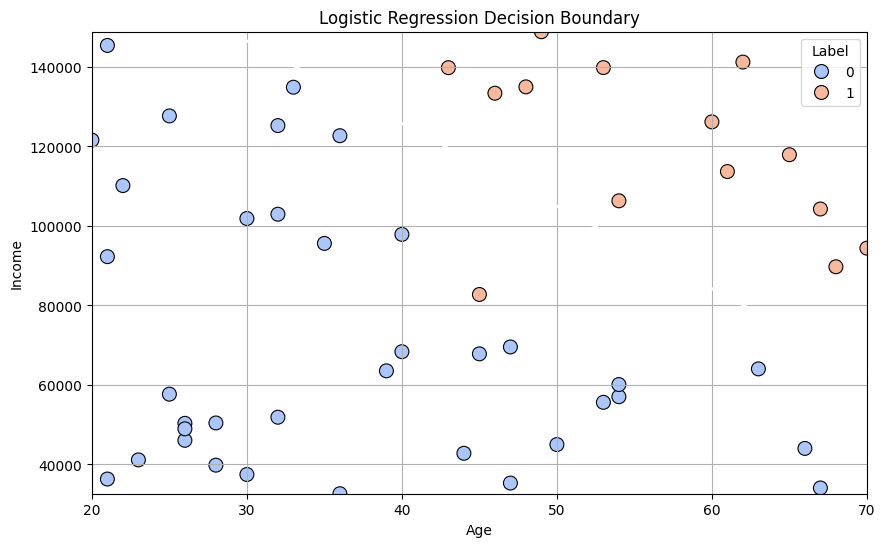

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("logistic_regression.csv")

# Features and target
X = df[['age', 'income']]
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='income', hue='label', palette='coolwarm', s=100, edgecolor='k')

# Plot decision boundary
import numpy as np

# Create a grid of values
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
income_range = np.linspace(df['income'].min(), df['income'].max(), 100)
xx, yy = np.meshgrid(age_range, income_range)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Draw contour line at threshold 0.5
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", linewidths=2)

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Label")
plt.grid(True)
plt.show()


In [32]:
data.head()

,Feature1,Feature2,Label
0,2.86,9.70,1
1,9.24,8.82,1
2,2.05,2.73,0
3,7.51,4.68,1
4,3.72,8.39,1
